In [107]:
#! usr/bin/env python3

import cv2
import pytesseract
from matplotlib import pyplot as plt

In [108]:
image_path = "images/pump/pump2_cut.png"

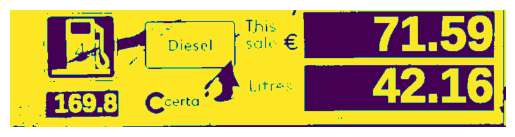

In [109]:
image = cv2.imread(image_path)
# Preprocessing gas pump image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Invert the image
inverted = cv2.bitwise_not(thresh)
# Apply dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(inverted, kernel, iterations=1)


plt.imshow(dilated)
plt.axis('off')
plt.show()

In [110]:
custom_config = r'--oem 3 --psm 6 outputbase'
text = pytesseract.image_to_string(dilated, config=custom_config)

In [111]:
print(text)